In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import *
from sklearn import preprocessing


In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_ROOT = '/content/drive/My Drive/ML_lab/lab1'
DATA_ROOT_DATA = '/content/drive/My Drive/ML_lab/lab1/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

print(os.listdir(DATA_ROOT))
['metadata.csv','sampleSubmission.csv','valid-v3.csv','test-v3.csv','.ipynb-checkpoints']

['data', 'old_sample', '.ipynb_checkpoints', 'class_sample_p1_1_1.ipynb', 'class_sample_p1_1_1_5layer.ipynb', 'class_sample_p1_1_1_5layer_wilson.ipynb', 'logs', 'ML_lab1_final.ipynb', 'ML_lab1_final_1.ipynb']


['metadata.csv',
 'sampleSubmission.csv',
 'valid-v3.csv',
 'test-v3.csv',
 '.ipynb-checkpoints']

In [4]:
data_1 = pd.read_csv(f'{DATA_ROOT_DATA}/train-v3.csv')
data_2 = pd.read_csv(f'{DATA_ROOT_DATA}/valid-v3.csv')
data_3 = pd.read_csv(f'{DATA_ROOT_DATA}/test-v3.csv')

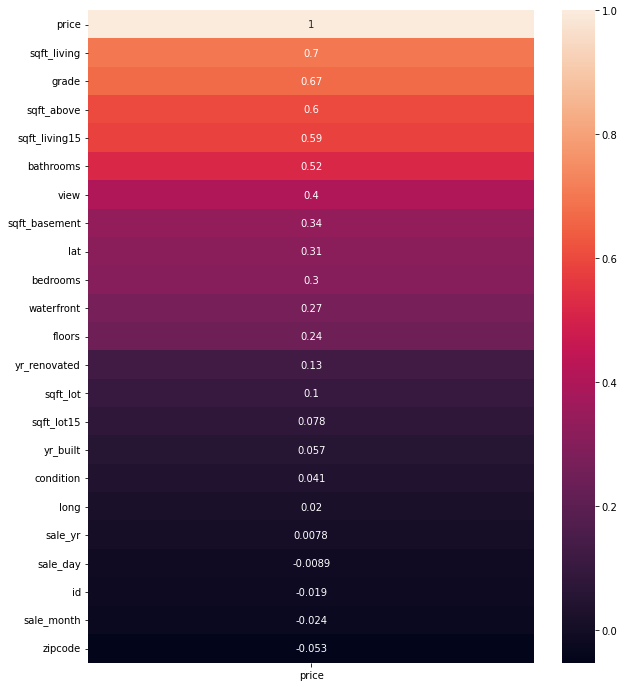

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,12))
price_corr = data_1.corr()[['price']].sort_values(
    by='price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax)


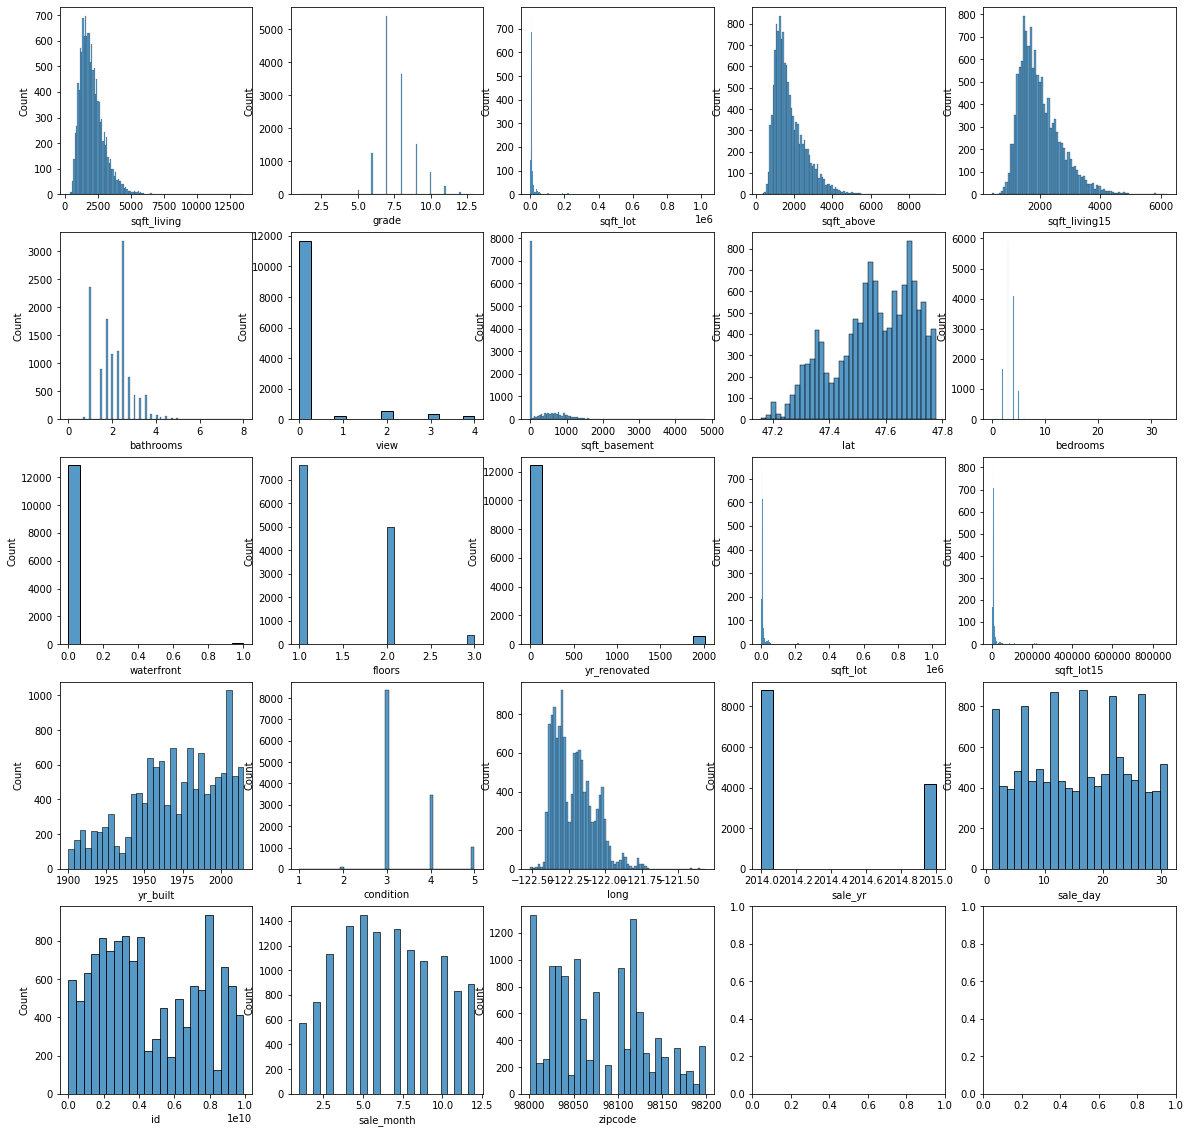

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
sns.histplot(ax=axes[0, 0], x= 'sqft_living', data= data_1);
sns.histplot(ax=axes[0, 1], x= 'grade', data= data_1);
sns.histplot(ax=axes[0, 2], x= 'sqft_lot', data= data_1);
sns.histplot(ax=axes[0, 3], x= 'sqft_above', data= data_1);
sns.histplot(ax=axes[0, 4], x= 'sqft_living15', data= data_1);
sns.histplot(ax=axes[1, 0], x= 'bathrooms', data= data_1);
sns.histplot(ax=axes[1, 1], x= 'view', data= data_1);
sns.histplot(ax=axes[1, 2], x= 'sqft_basement', data= data_1);
sns.histplot(ax=axes[1, 3], x= 'lat', data= data_1);
sns.histplot(ax=axes[1, 4], x= 'bedrooms', data= data_1);
sns.histplot(ax=axes[2, 0], x= 'waterfront', data= data_1);
sns.histplot(ax=axes[2, 1], x= 'floors', data= data_1);
sns.histplot(ax=axes[2, 2], x= 'yr_renovated', data= data_1);
sns.histplot(ax=axes[2, 3], x= 'sqft_lot', data= data_1);
sns.histplot(ax=axes[2, 4], x= 'sqft_lot15', data= data_1);
sns.histplot(ax=axes[3, 0], x= 'yr_built', data= data_1);
sns.histplot(ax=axes[3, 1], x= 'condition', data= data_1);
sns.histplot(ax=axes[3, 2], x= 'long', data= data_1);
sns.histplot(ax=axes[3, 3], x= 'sale_yr', data= data_1);
sns.histplot(ax=axes[3, 4], x= 'sale_day', data= data_1);
sns.histplot(ax=axes[4, 0], x= 'id', data= data_1);
sns.histplot(ax=axes[4, 1], x= 'sale_month', data= data_1);
sns.histplot(ax=axes[4, 2], x= 'zipcode', data= data_1);

In [7]:
data_1.price.value_counts()

350000    120
450000    109
550000     94
425000     93
500000     91
         ... 
685530      1
411100      1
640500      1
869900      1
176250      1
Name: price, Length: 2994, dtype: int64

In [8]:
data_1.bedrooms.value_counts()

3     5930
4     4104
2     1674
5      933
6      160
1      122
7       23
0        8
8        7
10       2
9        2
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
def remove_outliers(df, x):
    # Set Limits
    q25, q75 = np.percentile(df[x], 10), np.percentile(df[x], 90)
    print("q75r=",q75)
    print("q25r=",q25)
    iqr = q75 - q25
    print("iqr=",iqr)
    cut_off = iqr * 1.0
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [10]:
#remove_outliers(data_1,'price')
#remove_outliers(data_2,'price')

In [11]:
data_1.bedrooms.value_counts()

3     5930
4     4104
2     1674
5      933
6      160
1      122
7       23
0        8
8        7
10       2
9        2
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
data_2.bedrooms.value_counts()

3     975
4     693
2     283
5     157
6      30
1      17
9       2
7       1
10      1
8       1
0       1
Name: bedrooms, dtype: int64

In [13]:
data_1 = data_1[(data_1['bedrooms'] > 0) & (data_1['bedrooms'] < 12)]
data_2 = data_2[(data_2['bedrooms'] > 0) & (data_2['bedrooms'] < 12)]
#data_3 = data_1[(data_1['bedrooms'] > 0) & (data_3['bedrooms'] < 8)]
data_1.bedrooms.value_counts()

3     5930
4     4104
2     1674
5      933
6      160
1      122
7       23
8        7
10       2
9        2
11       1
Name: bedrooms, dtype: int64

In [14]:

#X_train = data_1.drop(['price','id'],axis=1).values
X_train = data_1.drop(['price','id','sale_day','sale_month','zipcode'],axis=1).values
Y_train = data_1['price'].values


#X_valid = data_2.drop(['price','id'],axis=1).values
X_valid = data_2.drop(['price','id','sale_day','sale_month','zipcode'],axis=1).values
Y_valid = data_2['price'].values


#X_test = data_3.drop(['id'],axis=1).values
X_test = data_3.drop(['id','sale_day','sale_month','zipcode'],axis=1).values


In [15]:
X_train.shape

(12958, 18)

In [16]:
print(X_train.shape, X_valid.shape, X_test.shape)

(12958, 18) (2160, 18) (6485, 18)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#X_train = scale(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense
import keras
drop_out_rate = 0.0
node_num =64
model = Sequential()
model.add(Dense(node_num, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(node_num*5,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
model.add(Dense(node_num,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
model.add(Dense(node_num*2,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
model.add(Dense(node_num,  kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
"""
model.add(Dense(node_num*5, kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
model.add(Dense(node_num, kernel_initializer='normal', activation='relu'))
model.add(Dropout(drop_out_rate))
"""
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='MAE', optimizer=optimizer)
#epochs = 120
epochs = 120
batch_size = 64
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 320)               20800     
                                                                 
 dropout_1 (Dropout)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                20544     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

In [20]:
%cd $DATA_ROOT

/content/drive/My Drive/ML_lab/lab1


In [ ]:
file_name = str(epochs) +'_'+str(batch_size)
TB=TensorBoard(log_dir='logs/'+file_name, histogram_freq=0)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, Y_valid), callbacks=[TB])

Epoch 1/120
203/203 [==============================] - 3s 6ms/step - loss: 183520.0938 - val_loss: 109692.6250
Epoch 2/120
203/203 [==============================] - 1s 5ms/step - loss: 120783.7031 - val_loss: 112317.0391
Epoch 3/120
203/203 [==============================] - 1s 5ms/step - loss: 120221.2578 - val_loss: 111025.8750
Epoch 4/120
203/203 [==============================] - 1s 6ms/step - loss: 116087.8828 - val_loss: 105901.0156
Epoch 5/120
203/203 [==============================] - 1s 6ms/step - loss: 114040.1406 - val_loss: 119073.7812
Epoch 6/120
203/203 [==============================] - 1s 6ms/step - loss: 112557.7266 - val_loss: 103537.8828
Epoch 7/120
203/203 [==============================] - 1s 6ms/step - loss: 111582.7031 - val_loss: 101937.7812
Epoch 8/120
203/203 [==============================] - 1s 5ms/step - loss: 110555.4141 - val_loss: 101326.8359
Epoch 9/120
203/203 [==============================] - 1s 5ms/step - loss: 110771.0234 - val_loss: 129417.2109
E

In [ ]:
%cd $DATA_ROOT

/content/drive/My Drive/ML_lab/lab1


In [ ]:
Y_predict = model.predict(X_test)
#np.savetxt('SampleSubmission5.csv',Y_predict, delimiter = ',', header='price')

In [ ]:
print(Y_predict)
Y_predict.shape

submission = pd.read_csv('./data/sampleSubmission_backup.csv')
submit = submission[['id']].copy()

submit['price'] = Y_predict
submit.to_csv('./data/SampleSubmission.csv',index=False)


[[643496.25]
 [552589.06]
 [525116.7 ]
 ...
 [338831.47]
 [421120.12]
 [241267.84]]


In [ ]:
print(Y_predict)

[[643496.25]
 [552589.06]
 [525116.7 ]
 ...
 [338831.47]
 [421120.12]
 [241267.84]]


In [ ]:
%pwd

'/content/drive/My Drive/ML_lab/lab1'

### TensorBoard 可視化工具

In [ ]:
# 這行指令可以幫助我們直接在jupyter notebook上顯示TensorBoard
%load_ext tensorboard

In [ ]:
%tensorboard  --logdir logs

Reusing TensorBoard on port 6006 (pid 7445), started 0:37:01 ago. (Use '!kill 7445' to kill it.)

<IPython.core.display.Javascript object>